# CSV Data Exploration and and Visualization



## 📌 Notebook Objective  
This notebook focuses on **exploring and analyzing structured data (CSV files)**.  
We will:  
✔ Load and inspect the datasets.  
✔ Perform exploratory data analysis (EDA) and visualize key insights.  
✔ Assess data quality and consistency before further processing.  

These insights will help us prepare for **data preprocessing and feature engineering** in the next steps.  


## 1.  Data Loading & Overview 

###  Import Required Libraries 

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import sys
from pathlib import Path
import importlib
import pandas as pd

### Setting Up Project Paths and Configurations

In [2]:
# Get the current notebook directory
CURRENT_DIR = Path(os.getcwd()).resolve()

# Automatically find the project root (go up 1 level)
PROJECT_ROOT = CURRENT_DIR.parents[1]

# Add project root to sys.path
sys.path.append(str(PROJECT_ROOT))

# Function to get relative paths from project root
def get_relative_path(absolute_path):
    return str(Path(absolute_path).relative_to(PROJECT_ROOT))

# Print project root directory
print(f"Project Root Directory: {PROJECT_ROOT.name}")  # Display only the root folder name

import config  # Now Python can find config.py

Project Root Directory: Data_Scientist_Rakuten_Project-main


### 1.2  Loading Training and Test Data 

In this section, we will load the **datasets** provided for the project.  
The following files will be loaded:
-  **X_train_update.csv** → Feature set for training
-  **y_train_CVw08PX.csv** → Target labels for training
-  **X_test_update.csv** → Feature set for testing 

In [3]:
# Reload config to ensure any updates are applied
importlib.reload(config

# # === 🔹 DEFINE DATA PATHS === #
# DATA_PATH = "../data/raw/text/"  # Répertoire où se trouvent les fichiers CSV
DATA_PATH = Path(config.RAW_CSV_DIR)
TRAIN_FILE = "X_train_update.csv"
TARGET_FILE = "y_train_CVw08PX.csv"
TEST_FILE = "X_test_update.csv"

# === 🔹 FUNCTION TO LOAD DATA === #
def load_data(file_name, data_path=DATA_PATH):
    """
    Load a dataset from the given file path.

    Parameters:
    - file_name (str): Name of the file to load.
    - data_path (str): Path where the file is located.

    Returns:
    - pd.DataFrame: Loaded dataset as a pandas DataFrame.
    """
    file_path = os.path.join(data_path, file_name)
    
    try:
        df = pd.read_csv(file_path,index_col=0)
        print(f"Successfully loaded {file_name} | Shape: {df.shape}")
        return df
    except FileNotFoundError:
        print(f"Error: The file {file_name} was not found in {data_path}")
        return None
    except Exception as e:
        print(f"Error loading {file_name}: {e}")
        return None

# === 🔹 LOAD DATASETS === #
X_train  = load_data(TRAIN_FILE)
y_train = load_data(TARGET_FILE)
X_test_submission    = load_data(TEST_FILE)


Successfully loaded X_train_update.csv | Shape: (84916, 4)
Successfully loaded y_train_CVw08PX.csv | Shape: (84916, 1)
Successfully loaded X_test_update.csv | Shape: (13812, 4)


### 1.3 Preview of the Data 

Before proceeding, we will display key dataset information to verify the loading process:
- A preview of the first rows
- Dataset shapes
- Consistency check between `X_train` and `y_train'

In [5]:
# === PREVIEW DATA === #
if X_train is not None:
    print("\n Sample Training Features (X_train):")
    display(X_train.head())

if y_train is not None:
    print("\n Sample Training Targets (y_train):")
    display(y_train.head())

if X_test_submission is not None:
    print("\n Sample Submission Features (X_test_submission):")
    display(X_test_submission.head())



 Sample Training Features (X_train):


,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786



 Sample Training Targets (y_train):


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705



 Sample Submission Features (X_test_submission):


,designation,description,productid,imageid
84916,Folkmanis Puppets - 2732 - Marionnette Et Théâ...,NaN,516376098,1019294171
84917,Porte Flamme Gaxix - Flamebringer Gaxix - 136/...,NaN,133389013,1274228667
84918,Pompe de filtration Speck Badu 95,NaN,4128438366,1295960357
84919,Robot de piscine électrique,<p>Ce robot de piscine d&#39;un design innovan...,3929899732,1265224052
84920,Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...,NaN,152993898,940543690


In [7]:
# === DATA SHAPE CHECK === #
if X_train is not None and y_train is not None:
    print(f"X_train Shape: {X_train.shape}")
    print(f"y_train Shape: {y_train.shape}")

    # Check if X_train and y_train have matching sample counts
    if X_train.shape[0] == y_train.shape[0]:
        print("X_train and y_train are aligned")
    else:
        print("/!\ Mismatch between X_train and y_train!")

if X_test_submission is not None:
    print(f"X_test_submission Shape: {X_test_submission.shape}")


X_train Shape: (84916, 4)
y_train Shape: (84916, 1)
X_train and y_train are aligned
X_test_submission Shape: (13812, 4)


## 2. Data Quality & Consistency Checks



Before moving forward, we need to check the **quality and consistency** of our datasets. This involves identifying missing values, verifying data types, detecting duplicates, ensuring consistency between training and test sets, and analyzing the class distribution.

### Key Aspects to Check:

We will examine:  
  **1. Missing values analysis**  
  **2. Data types (`info()`)**  
  **3. Duplicate detection (`duplicated()`)**  
  **4. Consistency between `X_train` and `X_test_submission`**  
  **5. Class distribution analysis (`prdtypecode`)**  


### 2.1 Missing values analysis

In [8]:
# === CHECK MISSING VALUES IN ALL DATASETS === #

def check_missing_values(df, df_name):
    """
    Check for missing values in a DataFrame and display appropriate message.

    Parameters:
    - df (pd.DataFrame): The dataset to check
    - df_name (str): Name of the dataset (for logging purposes)

    Returns:
    - None (Displays information about missing values)
    """
    missing_df = df.isna().sum().to_frame(name="Missing Count")
    missing_df["Missing %"] = (missing_df["Missing Count"] / len(df)) * 100
    missing_df = missing_df[missing_df["Missing Count"] > 0]

    if missing_df.empty:
        print(f"No missing values in {df_name}.")
    else:
        print(f"Missing values detected in {df_name}:")
        display(missing_df)

# Checking missing values in all datasets
print("Checking missing values:")
check_missing_values(X_train, "X_train")
check_missing_values(X_test_submission, "X_test_submission")
check_missing_values(y_train, "y_train")


Checking missing values:
Missing values detected in X_train:


,Missing Count,Missing %
description,29800,35.093504


Missing values detected in X_test_submission:


,Missing Count,Missing %
description,4886,35.375036


No missing values in y_train.


### 2.2 Data Types & General Info

In [9]:
# Display general information for all datasets
print("\nDataset Information for X_train:")
X_train.info()
print("\n" + "-"*50)
print("\nDataset Information for X_test_submission:")
X_test_submission.info()
print("\n" + "-"*50)
print("\nDataset Information for y_train:")
y_train.info()


Dataset Information for X_train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB

--------------------------------------------------

Dataset Information for X_test_submission:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13812 entries, 84916 to 98727
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  13812 non-null  object
 1   description  8926 non-null   object
 2   productid    13812 non-null  int64 
 3   imageid      13812 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 539.5+ KB

--------------------------------------------------

Dat

### 2.3. Duplicate Detection (duplicated())

In [13]:
# Check for duplicate rows in each dataset
print(f"\nDuplicate rows in X_train: {X_train.duplicated().sum()}")
print(f"Duplicate rows in X_test_submission: {X_test_submission.duplicated().sum()}")
print(f"Duplicate rows in y_train: {y_train.duplicated().sum()}")


Duplicate rows in X_train: 0
Duplicate rows in X_test_submission: 0
Duplicate rows in y_train: 84889


### 2.4. Consistency Between X_train and X_test_submission
Ensuring that the train and test datasets share the same structure.

In [14]:
# Checking structure consistency
if list(X_train.columns) == list(X_test_submission.columns):
    print("Train and Test datasets have matching columns.")
else:
    print("⚠ WARNING: The Train and X_test_submission datasets have different column structures!")
    print("Train Columns:", X_train.columns)
    print("Test Columns:", X_test_submission.columns)


Train and Test datasets have matching columns.


### 2.5. Class Distribution Analysis (prdtypecode)

We will first display the exact count of unique values in `y_train`.  
Then, we will visualize the distribution of product type codes (`prdtypecode`) using both **bar chart** and **pie chart** to better understand the class distribution.

#### Count unique product code values

In [15]:
import numpy as np

# === Get unique product codes === #
unique_product_codes = np.unique(y_train["prdtypecode"])

# Display unique values
print("Unique Product Codes:")
print(unique_product_codes)

Unique Product Codes:
[  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]


 #### Bar Chart: Class Distribution

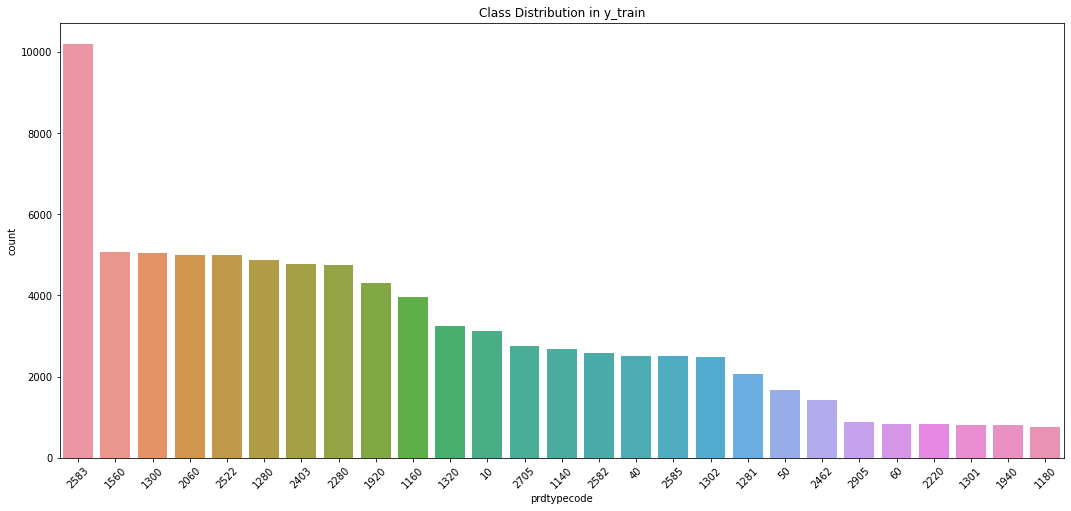

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(18,8))
large_to_small = y_train.groupby('prdtypecode').size().sort_values().index[::-1]
sns.countplot(data=y_train, x="prdtypecode",order=large_to_small)
plt.title("Class Distribution in y_train")
plt.xticks(rotation=45)
plt.show()

#### Pie Chart: Percentage of Each Class

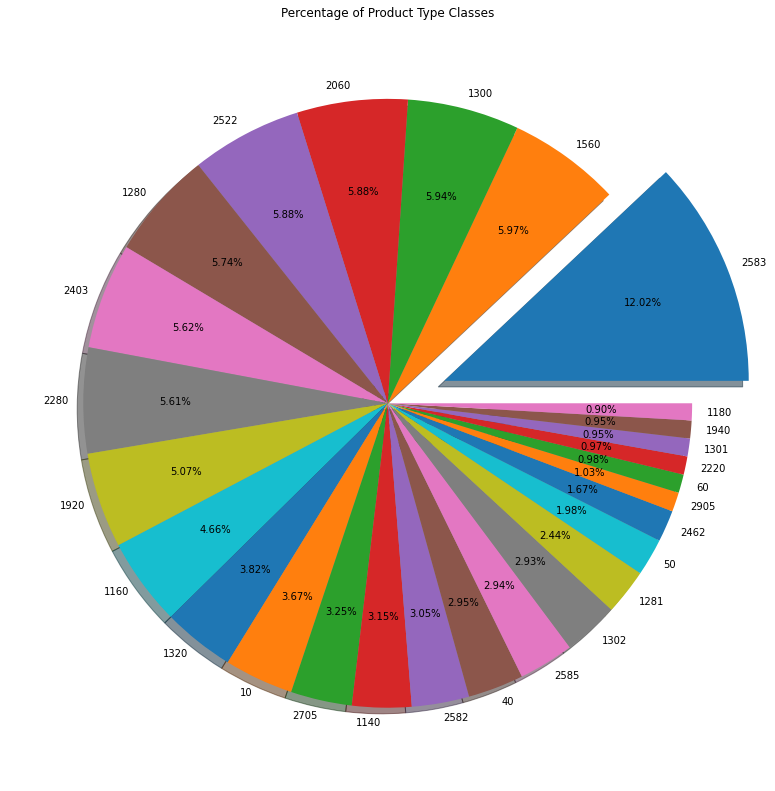

In [17]:
# === Pie Chart: Percentage of Each Class === #
typecodes = y_train["prdtypecode"].value_counts(normalize=True)  # Normalize to get percentages
explode = np.zeros(len(typecodes))
explode[typecodes.argmax()] = 0.2  # Highlight the most frequent class

plt.figure(figsize=(20,14))
plt.pie(
    x=typecodes,
    labels=typecodes.index,
    explode=explode,
    shadow=True, 
    autopct=lambda x: f"{x:.2f}%",
    pctdistance=0.7, 
    labeldistance=1.05
)
plt.title("Percentage of Product Type Classes")
plt.show()


### 2.6. Language Detection

In [18]:
# from langdetect import detect

# # Function to detect the language of a given text
# def detect_language(text):
#     try:
#         return detect(text)  # Returns the detected language (e.g., 'en' for English, 'fr' for French)
#     except:
#         return "unknown"  # In case the text cannot be detected properly

# # # Apply the function to detect the language for each entry in 'text' column
# # df_train['language'] = df_train['text'].apply(detect_language)
# # X_test_submission['language'] = X_test_submission['text'].apply(detect_language)



# # # Sample 1000 rows for faster testing
# # sample_train = X_train.sample(1000, random_state=42)
# # sample_train['language'] = sample_train['designation'].apply(detect_language)

# X_train['language'] = X_train['designation'].apply(detect_language)

# # Inspect sample results
# print(X_train[['designation', 'language']].head())


In [19]:
# # Get unique languages detected
# unique_languages = X_train['language'].unique()

# # Print the total number of unique languages
# print(f"Total number of unique detected languages: {len(unique_languages)}\n")

# # Display one example row for each language
# examples = {}
# for lang in unique_languages:
#     example_row = X_train[X_train['language'] == lang].iloc[0]  # Get the first occurrence of the language
#     examples[lang] = example_row['designation']  # Store the example text

# # Display results
# for lang, text in examples.items():
#     print(f"Language: {lang}")
#     print(f"Example: {text}")
#     print("-" * 50)  # Separator for readability


In [20]:
# pip install fasttext-wheel


In [21]:
# !pip install fasttext
# import fasttext

In [22]:
# pip install pybind11

In [23]:
# pip install git+https://github.com/facebookresearch/fastText.git

In [24]:
# import fasttext

# model = fasttext.load_model('lid.176.bin')
# print(model.predict("La Guerre Des Tuques"))

In [25]:
# from langdetect import detect_langs
# print(detect_langs("La Guerre Des Tuques"))  


In [26]:
# import matplotlib.pyplot as plt

# # Count the number of unique languages detected
# language_counts = X_train['language'].value_counts()

# # Print the total number of unique languages detected
# print(f"Total number of detected languages: {language_counts.shape[0]}")

# # Display the distribution of detected languages
# print("Detected language distribution:")
# print(language_counts)

# # Create a horizontal bar chart for better readability
# plt.figure(figsize=(16,6))
# language_counts.sort_values().plot(kind='barh', color='cornflowerblue')  # Horizontal bar chart
# plt.xlabel("Number of occurrences")  # Label for x-axis
# plt.ylabel("Languages")  # Label for y-axis
# plt.title("Distribution of Detected Languages")  # Title of the plot
# plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
# plt.show()  # Show the plot

# # # Create a pie chart for language distribution
# # plt.figure(figsize=(8, 8))
# # language_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
# # plt.ylabel("")  #


## 3. Observations from CSV Data 



### 3.1 Structure of the CSV Files
- **`X_train`** contains product features:
  - `designation` (product title) and `description` (optional product details).
  - `productid` (product identifier, used in the image file naming).
  - `imageid` (image identifier, also used in the image file naming).
- **`y_train`** contains the **target variable**:
  - `prdtypecode` (product category label for classification).
- **`X_test_submission`** follows the same structure as `X_train`, but without `prdtypecode`.

 **Image Naming Convention**  
Images are stored separately, and their filenames follow this format:  
`image_<imageid>_product_<productid>.jpg`  
This means that **both `imageid` and `productid` are needed** to correctly map an image to its corresponding product.

### 3.2 Missing Values
- **35.1%** of `description` is missing in `X_train`, and **35.4%** in `X_test_submission`.
- No missing values in `y_train`.  
-  **Action:** We need to decide whether to:  
  - **Remove rows with missing descriptions** if they are not useful.  
  - **Combine `designation` and `description`** into a single column to enrich product information.  
  - **Handle missing values** (e.g., replacing with placeholders like "No description available").


### 3.3 Data Types
- All columns have **appropriate data types**:
  - `productid` and `imageid` are **int64**.
  - `designation` and `description` are **object** (text fields).
  - `prdtypecode` in `y_train` is **int64** (correct for classification).
-  **No immediate action needed**, but text fields may require cleaning and preprocessing (e.g., lowercasing, removing special characters, tokenization, vectorization).

---

### 3.4 Duplicate Detection
- **No duplicate rows** detected in `X_train` and `X_test_submission`. 
- **Duplicate rows in `y_train`: 84,889** (expected, as it represents class labels).  
-  **No action required** for `y_train` as repeated labels are expected.

---

### 3.5 Consistency Between `X_train` and `X_test_submission`
- The **train and test datasets have matching columns** and **identical structure**.
- **No inconsistencies detected**, so the test dataset can be used directly in model evaluation.

---

### 3.6 Class Distribution in `prdtypecode`
- **27 unique product categories** (`prdtypecode`).  
- **Imbalance detected**:  
  - The **most frequent class (`2583`) represents 12.02%** of the dataset.  
  - Some **less frequent classes (`60`, `2220`, `1301`, `1940`, `1180`)** have less than **1%** representation.  
- **Possible actions**:
  - If class imbalance is significant, consider **oversampling or undersampling** techniques.
  - Investigate whether **merging underrepresented classes** is a viable option.


### 3.7 Language Detection 

The text data (product designation) is in three languages:**French**, **English** and **German**.
Knowing this is useful because:
- Different languages have different stopwords, so we need to handle them separately.
- Some cleaning techniques, like stemming or lemmatization, work better if we know the language.
- It helps ensure that special characters (accents, etc.) are correctly handle

---

###  **Building a Complete Training Dataset (`X_full_train`)**  

Now that we have analyzed the CSV data, we need to **combine product metadata (`X_train`) with target labels (`y_train`)** to create a **single structured dataset**:  

📌 **`X_full_train` = `X_train` + `y_train`**  

This step is crucial because:  
- It **links each product's features to its target category (`prdtypecode`)** for supervised learning.  
- It **ensures a unified dataset** before applying text/image processing.  
- It **facilitates the integration of image features** in later stages.  


## 4. Building a Complete Training Dataset (`X_full_train`)

In [27]:
# Merge training features and target labels
X_full_train  = X_train.copy()
X_full_train ["prdtypecode"] = y_train["prdtypecode"]


# Display basic information
print(f"Dataset `X_full_train` created with shape: {X_full_train.shape}")
display(X_full_train.head())

print("\n" + "-"*50)
# Display dataset information
print("\nDataset Information for X_full_train:")
X_full_train.info()

print("\n" + "-"*50)
# Check for duplicate rows
print(f"\nDuplicate rows in X_full_train: {X_full_train.duplicated().sum()}")


Dataset `X_full_train` created with shape: (84916, 5)


,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705



--------------------------------------------------

Dataset Information for X_full_train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
 4   prdtypecode  84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.9+ MB

--------------------------------------------------

Duplicate rows in X_full_train: 0


## 5. Save Datasets for Future Use  

To avoid reloading and recomputing the datasets in every notebook, we save them as **Pickle files**.  

We will store:  
- **`X_full_train.pkl`** → Contains the **training features (`X_train`) and labels (`y_train`)**.  
- **`X_test_submission.pkl`** → Contains the **test dataset (`X_test`)**, which will be used for final submission.  
- **`y_train.pkl`** → Stores the **target labels (`y_train`) separately**, in case we need them later.  

This allows us to **reuse these datasets** in later notebooks, including **image exploration and model training**.


In [34]:
# Reload config to ensure any updates are applied
importlib.reload(config)



# Define the directory where Pickle files will be stored
PICKLE_DIR = Path(config.INTERIM_DIR)
os.makedirs(PICKLE_DIR, exist_ok=True)  # Ensure the directory exists

# Define file paths (using uppercase for constants)
TRAIN_PICKLE_PATH = PICKLE_DIR / "X_full_train.pkl"
TEST_SUB_PICKLE_PATH = PICKLE_DIR / "X_test_submission.pkl"
Y_TRAIN_PICKLE_PATH = PICKLE_DIR / "y_train.pkl"  # Saving target labels separately



try:
    # Save X_full_train
    X_full_train.to_pickle(TRAIN_PICKLE_PATH)
    print(f"\nSuccessfully saved `X_full_train.pkl` at {TRAIN_PICKLE_PATH}")
except Exception as e:
    print(f"\nError saving `X_full_train.pkl`: {e}")

try:
    # Save X_test_submission separately for future inference
    X_test_submission.to_pickle(TEST_SUB_PICKLE_PATH)
    print(f"\nSuccessfully saved `X_test_submission.pkl` at {TEST_SUB_PICKLE_PATH}")
except Exception as e:
    print(f"\nError saving `X_test.pkl`: {e}")

try:
    # Save y_train separately in case it's needed later
    y_train.to_pickle(Y_TRAIN_PICKLE_PATH)
    print(f"\nSuccessfully saved `y_train.pkl` at {Y_TRAIN_PICKLE_PATH}")
except Exception as e:
    print(f"\nError saving `y_train.pkl`: {e}")



Successfully saved `X_full_train.pkl` at D:\Data_Science\Append_Data_Engineer_AWS_MLOPS\Data_Scientist_Rakuten_Project-main\data\interim\X_full_train.pkl

Successfully saved `X_test_submission.pkl` at D:\Data_Science\Append_Data_Engineer_AWS_MLOPS\Data_Scientist_Rakuten_Project-main\data\interim\X_test_submission.pkl

Successfully saved `y_train.pkl` at D:\Data_Science\Append_Data_Engineer_AWS_MLOPS\Data_Scientist_Rakuten_Project-main\data\interim\y_train.pkl


## 6. 🔄 Next Steps

We have commpleted the **exploration of structured data (CSV files)** and built `X_full_train`, which contains:  
**Product metadata** (`designation`, `description`, `productid`, `imageid`).  
**Target labels** (`prdtypecode`).  

Since our dataset also includes **product images**, the next step is to analyze them.  
In **`2_Image_Exploration_and_Visualization.ipynb`**, we will:  

### **What’s Next?**  

✔ **1. Verify image availability**  
   → Check if each `(imageid, productid)` pair in `X_full_train` has a corresponding image file.  

✔ **2. Analyze image properties (size, format, color mode, brightness & contrast)**  
   → Check for consistency across images and detect any irregularities that may impact model performance. 

✔**3. Visualize a random sample of images**  
   → Understand image quality and variability.  

➡️ **Proceed to `3_Image_Exploration_and_Visualization.ipynb` for image analysis.**  
